# pie chart

In [2]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


## pie : 카테고리값의 상대적인 비교


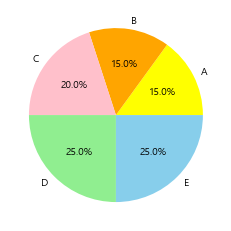

In [181]:
labels = ['A','B','C','D','E']
datas=[15,15,20,25,25]
colors = ['yellow','orange','pink','lightgreen','skyblue']

plt.figure()
plt.pie(datas,labels=labels, colors=colors, autopct='%1.1f%%')
plt.rc('font', size=15) 
plt.show()
plt.close()

In [26]:
dataset = pd.read_csv('C:/Users/whgud/data/auto-mpg.csv',header=None)
dataset.columns=['mpg','cyl','disp','horsepower','weight','acc','year','origin','name']
dataset['cnt']=1
dataset

,mpg,cyl,disp,horsepower,weight,acc,year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cyl         398 non-null    int64  
 2   disp        398 non-null    float64
 3   horsepower  398 non-null    object 
 4   weight      398 non-null    float64
 5   acc         398 non-null    float64
 6   year        398 non-null    int64  
 7   origin      398 non-null    int64  
 8   name        398 non-null    object 
 9   cnt         398 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [33]:
# 제조국으로 그룹을 지어서 라벨인덱스 변경
origin_grp_frm = dataset.groupby('origin').sum()
origin_grp_frm.index=['USA','EU',"KOR"] # 인덱스 이름 변경
origin_grp_frm

,mpg,cyl,disp,weight,acc,year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOR,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [36]:
# 실린더로 그룹을 지어서 라벨인덱스 변경
cyl_grp_frm = dataset.groupby('cyl').sum()
cyl_grp_frm.index=['cyl3','cyl4','cyl5','cyl6','cyl8']
cyl_grp_frm

,mpg,disp,weight,acc,year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


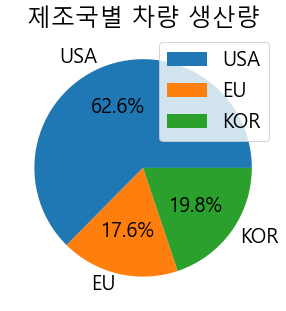

In [172]:
# 제조국별 차량 생산량을 파이로 구현한다면?
plt.figure(figsize=(10,5))
plt.pie(origin_grp_frm['cnt'],labels=origin_grp_frm.index,autopct='%1.1f%%')
plt.title("제조국별 차량 생산량")
plt.legend(labels=origin_grp_frm.index)
plt.rc('font', size=10)
plt.show()
plt.close()

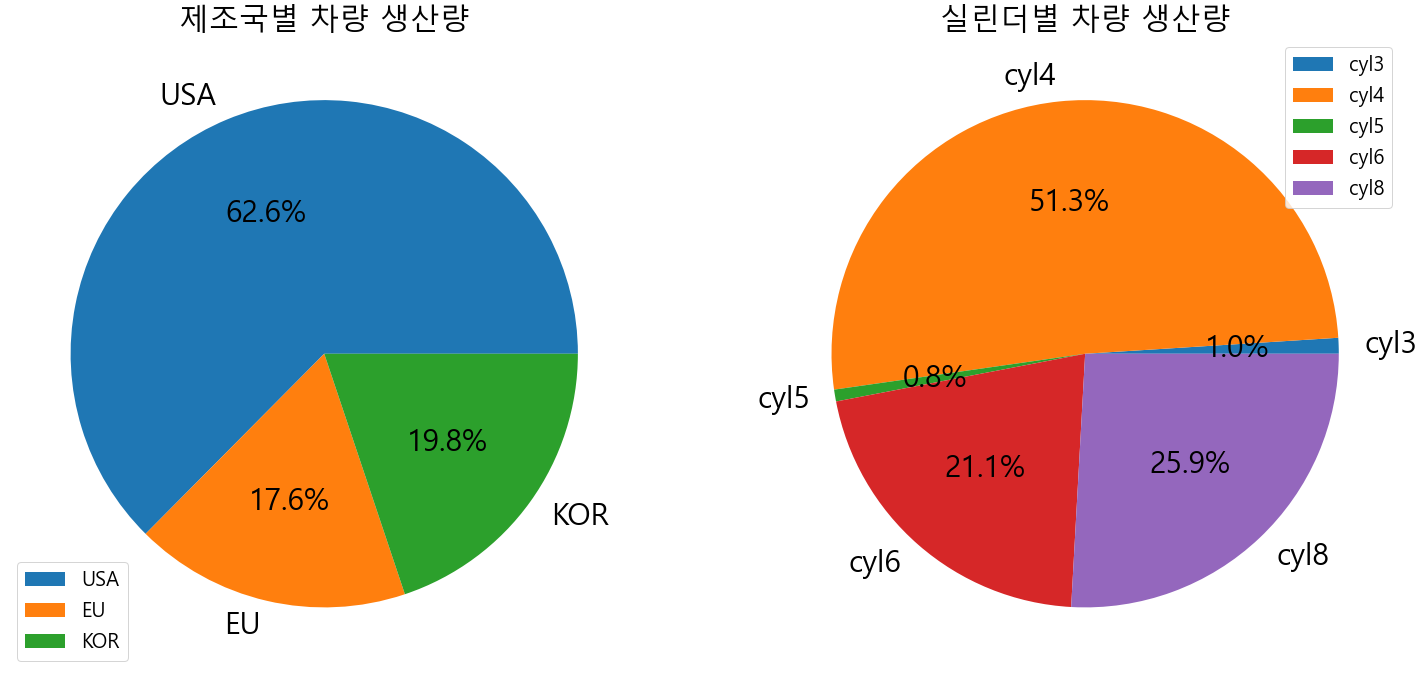

In [169]:
# 제조국과 실린더별 파이차트 구현
fig = plt.figure(figsize = (25,15))

ax01 = fig.add_subplot(1,2,1) # 어떻게 지정하는지에 따라 그래프 나오는 형태가 바뀜 
ax02 = fig.add_subplot(1,2,2)
plt.rc('font', size=30) 


ax01.pie(origin_grp_frm['cnt'],labels=origin_grp_frm.index,autopct='%1.1f%%')
ax01.set_title("제조국별 차량 생산량",size=30)
ax01.legend(labels=origin_grp_frm.index,loc='best')
plt.rc('legend', fontsize=20)# 범례 폰트 크기

ax02.pie(cyl_grp_frm['cnt'],labels=cyl_grp_frm.index,autopct='%1.1f%%') # 전입지가 경기도인 값만 추출
ax02.set_title("실린더별 차량 생산량",size=30)
ax02.legend(labels=cyl_grp_frm.index,loc='best')

plt.show()
plt.close()

In [ ]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

## histogram : 구간에 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도수를 시각화할때 사용한다.

type: <class 'numpy.ndarray'>


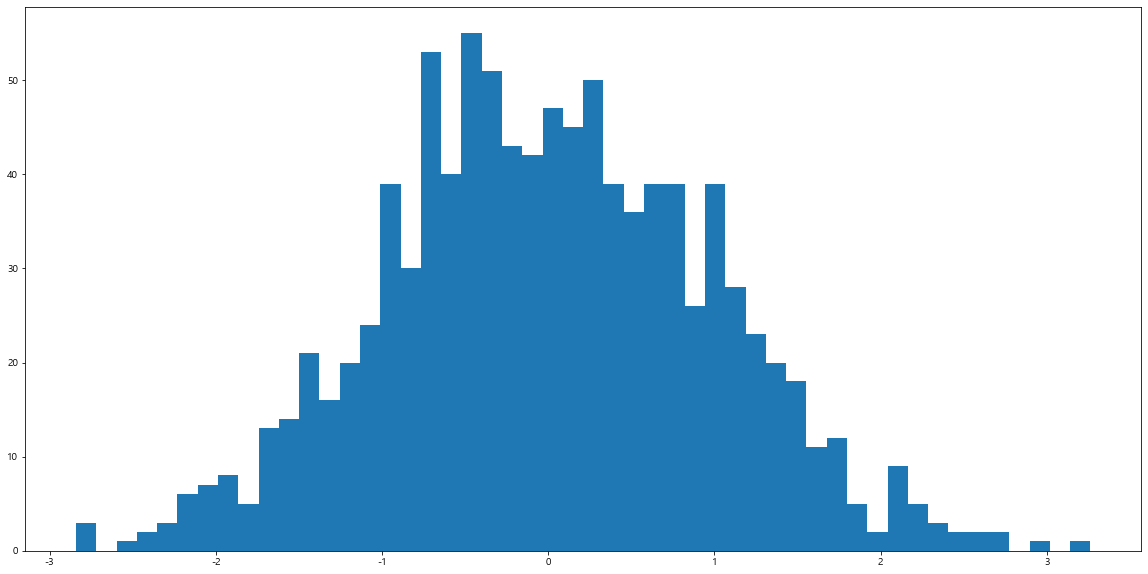

In [79]:
datas=np.random.randn(1000)
print("type:",type(datas))
fig=plt.figure(figsize=(20,10))
plt.hist(datas,bins=50)

plt.show()
plt.close()

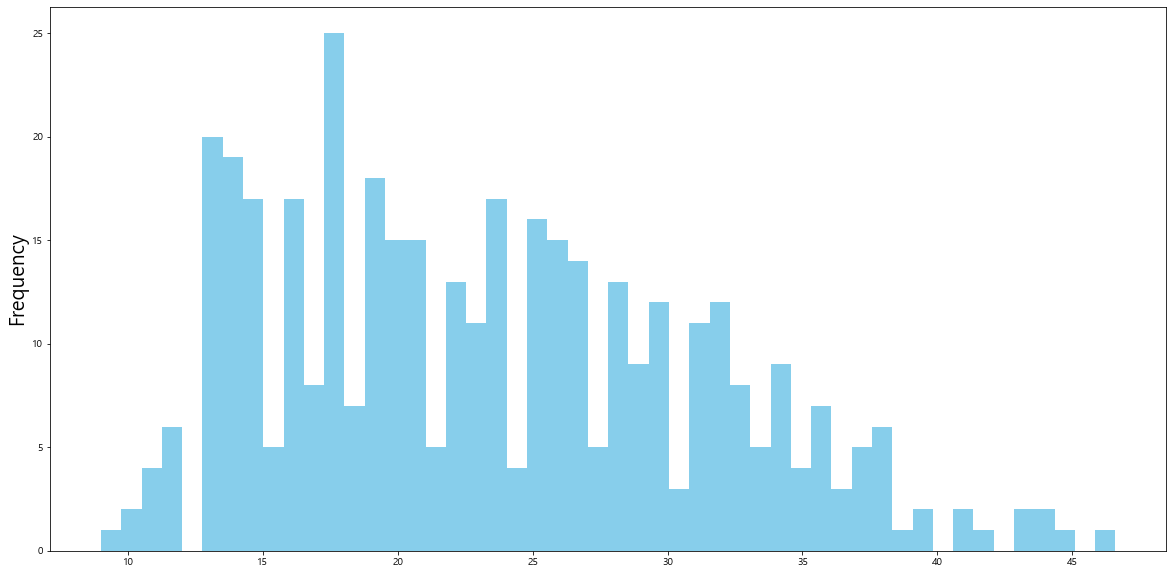

In [75]:
fig=plt.figure(figsize=(20,10))
#plt.hist(dataset['mpg'],bins=50)
dataset['mpg'].plot(kind='hist',bins=50,color='skyblue')
plt.show()
plt.close()

## koweps_visualization.xlsx[실습]

In [150]:
koweps_dataset=pd.read_excel('C:/Users/whgud/data/koweps_visualization.xlsx')
koweps_dataset

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


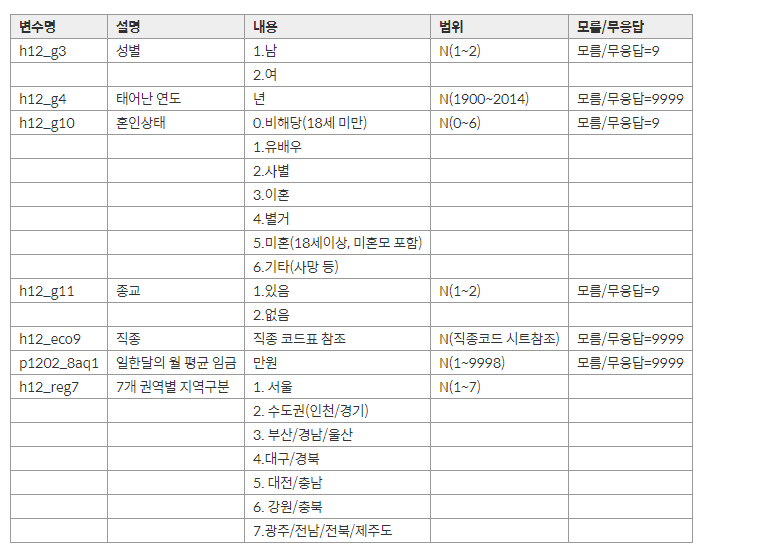

In [83]:
from IPython.display import Image
Image('C:/img/koweps_img.png',width=700)

In [151]:
koweps=koweps_dataset.copy()

In [152]:
# 필요한 칼럼만 필터링해서 가져오기
koweps_frm=koweps[['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']]
# 칼럼이름 변경
koweps_frm.columns=['성별','태어난 연도','혼인상태','종교','직종','일한달의 월 평균 임금','7개 권역별 지역구분']
koweps_frm

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [153]:
koweps_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            15422 non-null  int64  
 1   태어난 연도        15422 non-null  int64  
 2   혼인상태          15422 non-null  int64  
 3   종교            15422 non-null  int64  
 4   직종            7131 non-null   float64
 5   일한달의 월 평균 임금  4507 non-null   float64
 6   7개 권역별 지역구분   15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


In [154]:
# 성별이 1인경우는 남자, 2인 경우는 여자로 나타내는 성별2 컬럼을 추가해보자
koweps_frm['성별2']=koweps_frm['성별'].apply(lambda x:'남자' if x==1 else '여자')
# 방법2
#koweps_frm['성별2']=np.where(koweps_frm.filter([성별])==1,'남자','여자')
koweps_frm.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,여자
1,2,1945,2,2,NaN,NaN,1,여자
2,1,1948,2,2,NaN,NaN,1,남자
3,1,1942,3,1,762.0,108.9,1,남자
4,2,1923,2,1,NaN,NaN,1,여자


In [7]:
print('결측값 확인')
koweps_frm.isna().sum()

결측값 확인


성별                  0
태어난 연도              0
혼인상태                0
종교                  0
직종               8291
일한달의 월 평균 임금    10915
7개 권역별 지역구분         0
성별2                 0
dtype: int64

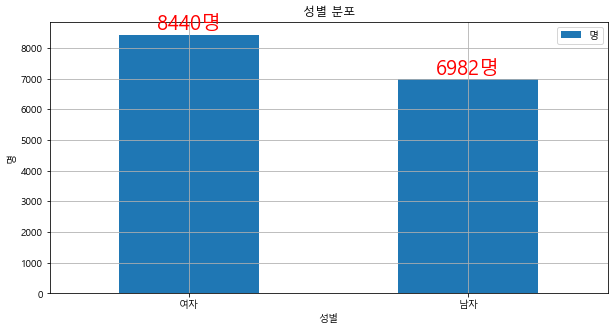

In [13]:
# 조사대상자들에 대한 성별 분포를 막대그래프로 시각화한다면?

gender_frm=pd.DataFrame(koweps_frm['성별2'].value_counts())
gender_frm.rename(columns={'성별2':'명'},inplace=True)

gender_frm.plot(kind='bar',rot=0,figsize=(10,5))
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list(gender_frm['명'])):
    txt='%d명' % value
    plt.text(idx,value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=20,
            color='red')

plt.rc('legend', fontsize=20) 
plt.rc('axes', labelsize=8)
plt.rc('font', size=13)  
plt.show()
plt.close()

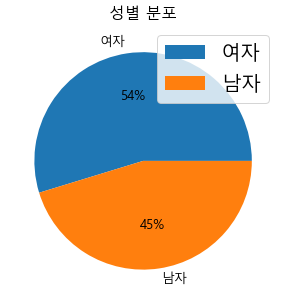

In [14]:
# 조사대상자들에 대한 성별 분포를 파이차트로 시각화한다면?

fig = plt.figure(figsize = (10,5))
plt.pie(gender_frm['명'], labels=gender_frm.index,autopct='%d%%')
plt.legend(labels=gender_frm.index, loc='best')
plt.title('성별 분포')


# for idx, value in enumerate(list(gender_frm['명'])):
#     txt='%d명' % value
#     plt.text(idx,value, txt,
#             horizontalalignment='center',
#             verticalalignment='bottom',
#             fontsize=20,
#             color='red')

plt.rc('legend', fontsize=8) 
plt.rc('font', size=13)   
plt.show()
plt.close()

결측값 확인 : 성별                  0
일한달의 월 평균 임금    10915
dtype: int64
결측값 제거 전


,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


결측값 제거 후


,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


이상치의 데이터프레임


,성별,일한달의 월 평균 임금
76,남자,841.0
80,남자,691.0
133,남자,1800.0
175,남자,693.0
244,남자,758.0
...,...,...
14970,남자,641.0
15019,남자,952.0
15195,남자,654.0
15292,남자,842.0


207

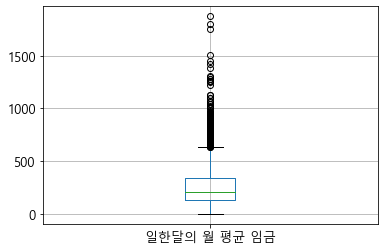

In [15]:
### 성별에 따른 평균 급여 차이를 분석
# 성별과 월급 데이터만 추출
# 성별을 남자와 여자로 변환 -> 위에서 변환한 성별 2칼럼 사용.
sex_salary_frm=koweps_frm[['성별2','일한달의 월 평균 임금']]
sex_salary_frm.rename(columns={'성별2':'성별'},inplace = True)

# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
# 결측값 확인
print("결측값 확인 :",sex_salary_frm.isna().sum()) 

# 결측값 제거
del_na_frm=sex_salary_frm.dropna()
print("결측값 제거 전")
display(sex_salary_frm)
print("결측값 제거 후")
display(del_na_frm)

# 이상치 확인
del_na_frm.boxplot()

#이상치 결측 처리
iqr=del_na_frm.quantile(q=0.75)-del_na_frm.quantile(q=0.25)
lower=del_na_frm.quantile(q=0.25)-(1.5*iqr) #최저한계치
upper=del_na_frm.quantile(q=0.75)+(1.5*iqr) #최고한계치
lower_outlier = del_na_frm[del_na_frm>lower].min() 
upper_outlier = del_na_frm[del_na_frm<upper].max() 
salary_outlier_frm=del_na_frm[(del_na_frm['일한달의 월 평균 임금']<lower_outlier['일한달의 월 평균 임금'])|(del_na_frm['일한달의 월 평균 임금']>upper_outlier['일한달의 월 평균 임금'])]
print('이상치의 데이터프레임')
display(salary_outlier_frm)

# 이상치를 결측값으로 변경
for idx in salary_outlier_frm.index:
    del_na_frm.loc[idx,'일한달의 월 평균 임금']=np.NaN
    
# 결측값 있는지 확인
del_na_frm['일한달의 월 평균 임금'].isna().sum()

,일한달의 월 평균 임금
성별,
남자,289.125203
여자,170.066146


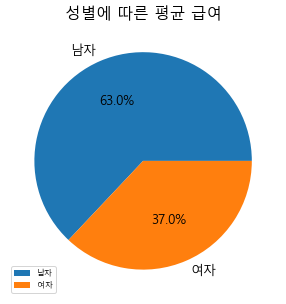

In [16]:
# 데이터 분석(성별로 그룹화하여 그룹별 평균)
sex_salary_grp=del_na_frm.dropna().groupby('성별').mean()
display(sex_salary_grp)


# 데이터 시각화
plt.figure(figsize=(10,5))

plt.pie(sex_salary_grp['일한달의 월 평균 임금'], labels=sex_salary_grp.index,autopct='%1.1f%%')
plt.title('성별에 따른 평균 급여')
plt.legend(sex_salary_grp.index, loc='best')
plt.rc('legend', fontsize=12) 
plt.rc('font', size=13)   
plt.show()
plt.close()

나이 파생변수 추가


,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,86
1,1945,NaN,77
2,1948,NaN,74
3,1942,108.9,80
4,1923,NaN,99
...,...,...,...
15417,1967,NaN,55
15418,1992,NaN,30
15419,1995,72.0,27
15420,1998,NaN,24


결측값 제거후


,태어난 연도,일한달의 월 평균 임금,나이
3,1942,108.9,80
10,1940,20.0,82
16,1978,322.0,44
17,1975,120.0,47
24,1975,300.0,47
...,...,...,...
15400,1966,230.0,56
15401,1962,138.0,60
15404,1993,286.0,29
15412,1956,179.0,66


이상치의 데이터프레임


,태어난 연도,일한달의 월 평균 임금,나이
76,1968,841.0,54
80,1973,691.0,49
133,1956,1800.0,66
175,1975,693.0,47
244,1979,758.0,43
...,...,...,...
14970,1977,641.0,45
15019,1976,952.0,46
15195,1965,654.0,57
15292,1973,842.0,49


207

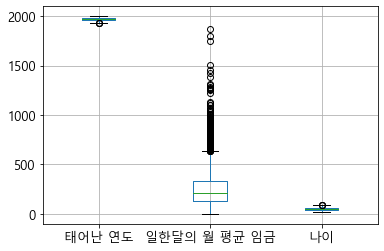

In [54]:
### 나이에 따른 평균 급여 변화
# 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
year_salary_frm = koweps_frm[['태어난 연도','일한달의 월 평균 임금']]
year_salary_frm['나이']=pd.Timestamp('now').year - year_salary_frm['태어난 연도'] + 1
print('나이 파생변수 추가')
display(year_salary_frm)
# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
#결측값 확인
year_salary_frm.isna().sum()

#결측값 제거
year_salary_del_na= year_salary_frm.dropna()
print('결측값 제거후')
display(year_salary_del_na)


# 이상치 확인
year_salary_del_na.boxplot()

# #이상치 결측 처리
iqr1=year_salary_del_na.quantile(q=0.75)-year_salary_del_na.quantile(q=0.25)
lower1=year_salary_del_na.quantile(q=0.25)-(1.5*iqr1) #최저한계치
upper1=year_salary_del_na.quantile(q=0.75)+(1.5*iqr1) #최고한계치
lower_outlier1 = year_salary_del_na[year_salary_del_na>lower1].min() 
upper_outlier1 = year_salary_del_na[year_salary_del_na<upper1].max() 
age_outlier_frm=year_salary_del_na[(year_salary_del_na['일한달의 월 평균 임금']<lower_outlier1['일한달의 월 평균 임금'])|(year_salary_del_na['일한달의 월 평균 임금']>upper_outlier1['일한달의 월 평균 임금'])]
print('이상치의 데이터프레임')
display(age_outlier_frm)

# 이상치를 결측값으로 변경
for idx in age_outlier_frm.index:
    year_salary_del_na.loc[idx,'일한달의 월 평균 임금']=np.NaN
    
# 결측값 있는지 확인
year_salary_del_na['일한달의 월 평균 임금'].isna().sum()



,태어난 연도,일한달의 월 평균 임금
나이,,
24,1998,89.333333
25,1997,136.720000
26,1996,140.807692
27,1995,138.000000
28,1994,145.652000
...,...,...
90,1932,21.200000
91,1931,25.000000
92,1930,20.000000


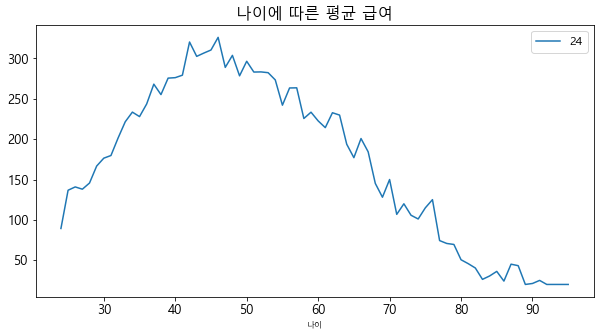

In [55]:
# 데이터 분석(나이별 따른 급여평균)

# 결측값 제거하면서 시각화하기 편하게 데이터프레임 조정
age_salary_grp=year_salary_del_na.dropna().groupby('나이').mean()
display(age_salary_grp)


# 데이터 시각화
plt.figure(figsize=(10,5))
age_salary_grp['일한달의 월 평균 임금'].plot(kind='line')
plt.title('나이에 따른 평균 급여')
plt.legend(age_salary_grp.index, loc='best')
plt.rc('legend', fontsize=12) 
plt.rc('font', size=13)   
plt.show()
plt.close()

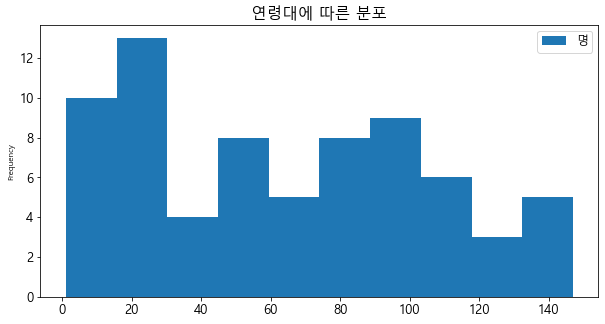

In [29]:
### 연령대에 따른 분포
age_count=pd.DataFrame(year_salary_del_na['나이'].value_counts())
age_count.sort_index(ascending=True,inplace=True)
age_count.rename(columns={'나이':'명'},inplace=True)
age_count

plt.figure(figsize=(10,5))
age_count['명'].plot(kind='hist')
plt.title('연령대에 따른 분포')
plt.legend(age_count.columns, loc='best')
plt.rc('legend', fontsize=12) 
plt.rc('font', size=13)   
plt.show()
plt.close()


,태어난 연도,일한달의 월 평균 임금,나이
연령대,,,
20,1994.586387,148.008377,27.413613
30,1987.426546,229.484923,34.573454
40,1977.247971,298.732435,44.752029
50,1968.015610,268.199990,53.984390
60,1958.053191,199.078450,63.946809
70,1948.070423,109.771549,73.929577
80,1939.193182,39.289205,82.806818
90,1930.700000,21.600000,91.300000


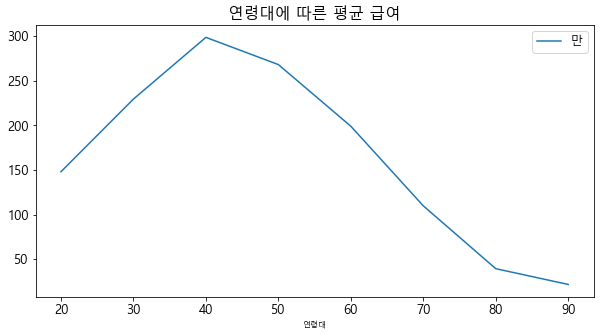

In [74]:
# 연령대별 평균 급여 변화
year_salary_del_na.isna().sum() # 결측값 확인


# 연령대를 나타내는 컬럼 추가
year_salary_del_na['연령대']=year_salary_del_na['나이']-year_salary_del_na['나이']%10

# 결측값 제거하면서 시각화하기 편하게 데이터프레임 조정
age_group_salary_grp=year_salary_del_na.dropna().groupby('연령대').mean()

display(age_group_salary_grp)

# 데이터 시각화
plt.figure(figsize=(10,5))
age_group_salary_grp['일한달의 월 평균 임금'].plot(kind='line')
plt.title('연령대에 따른 평균 급여')
plt.legend("만", loc='best')
plt.rc('legend', fontsize=12) 
plt.rc('font', size=13)   
plt.show()
plt.close()


일한달의 월 평균 임금
성별 연령대              
남자 20     143.745763
   30     262.242487
   40     389.867719
   50     412.900927
   60     330.166087
   70     158.890566
   80      51.730986
   90      20.000000
여자 20     149.913636
   30     207.542172
   40     222.988728
   50     199.498063
   60     150.576246
   70      78.647980
   80      30.876190
   90      22.285714

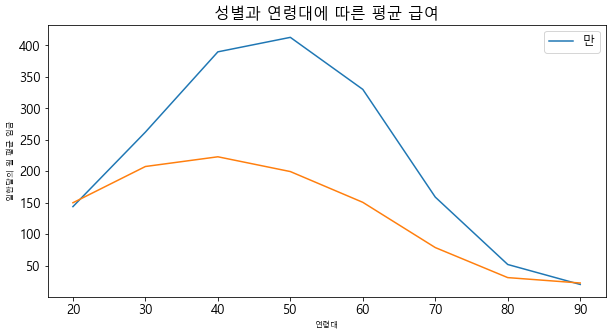

In [126]:
### 성별과 연령대에 따른 평균 급여 변화
age_gender_frm=koweps_frm[['성별2','일한달의 월 평균 임금','태어난 연도']]
age_gender_frm.isna().sum() # 결측치 확인
age_gender_frm.dropna(inplace=True) # 결측치 제거

# 필요한 파생변수 추가
age_gender_frm['나이']=pd.Timestamp('now').year-age_gender_frm['태어난 연도']+1 # 파생변수 '나이' 추가
age_gender_frm['연령대']=age_gender_frm['나이']-age_gender_frm['나이']%10 # 파생변수 '연령대' 추가

# 결측값 제거하면서 시각화하기 편하게 데이터프레임 조정
age_gender_frm.rename(columns={'성별2':'성별'},inplace=True) # 칼럼이름 변경 : 성별2 -> 성별
age_gender_frm_grp=age_gender_frm.pivot_table(index=['성별','연령대'],values=['일한달의 월 평균 임금'],aggfunc='mean')
display(age_gender_frm_grp)

# 데이터 시각화
plt.figure(figsize=(10,5))
# seaborn lib add
import seaborn as sns
sns.lineplot(data=age_gender_frm_grp,x='연령대',y='일한달의 월 평균 임금',hue='성별')

plt.title('성별과 연령대에 따른 평균 급여')
plt.legend("만", loc='best')
plt.rc('legend', fontsize=12) 
plt.rc('font', size=13)   
plt.show()
plt.close()

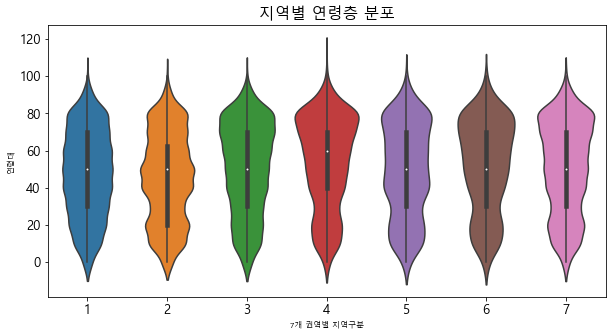

In [178]:
### 지역별 연령층 분포와 연령층별 지역비율
area_age=koweps_frm[['7개 권역별 지역구분','태어난 연도']]

# 결측값 확인
area_age.isna().sum() #결측값 없음

# 필요한 파생변수 추가
area_age['나이']=pd.Timestamp('now').year-area_age['태어난 연도']+1 # 파생변수 '나이' 추가
area_age['연령대']=area_age['나이']-area_age['나이']%10 # 파생변수 '연령대' 추가
area_age

# 지역별 연령층 분포
plt.figure(figsize=(10,5))

sns.violinplot(data=area_age,x='7개 권역별 지역구분',y='연령대')

plt.title('지역별 연령층 분포')

plt.rc('font', size=13)   
plt.show()
plt.close()


# 연령층별 지역비율
